# CH03. 회귀 알고리즘과 모델 규제
농어의 무게를 예측하라!

# 03-1. k-최근접 이웃 회귀
- K-최근접 이웃 분류 알고리즘
1. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
2. 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측

- K-최근접 이웃 회귀 알고리즘
1. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
2. 이웃 샘플의 평균으로 사용해 새로운 샘플 X의 타깃을 예측
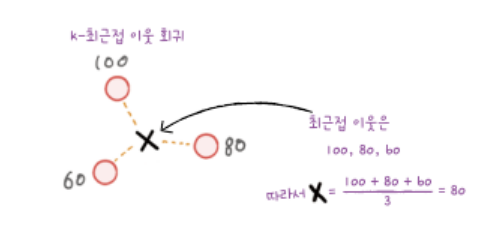

## 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

데이터의 형태를 확인하게 위해 산점도를 그림

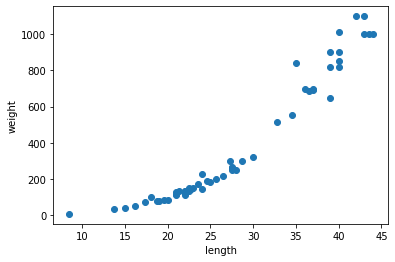

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트와 테스트 세트로 분리

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(42,) (14,)


(4, 1) 배열을 (2, 2)로 변경

In [8]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [9]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [10]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
# test_array = test_array.reshape(2, 3)

(42,) (14,) 1차원 배열을 (42, 1) (14, 1) 2차원 배열로 변경

In [11]:
# 크기에 -1로 지정하면 나머지 원소 개수로 모두 채우라는 의미
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [12]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [15]:
knr.score(test_input, test_target)

0.992809406101064

- 결정계수
    1. 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더함
    2. 타깃과 타깃 평균의 차이를 제곱하여 더한 값을 나눔
    - 타겟의 평균 정도를 예측하는 수준이면, 0에 가까워짐(분자와 분모가 비슷함)
    - 예측이 타깃과 아주 가까워지면 1에 가까운 값이 됨(분자가 0에 가까워짐)
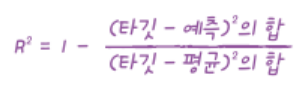

- mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


19g 정도 타깃값과 다름

## 과대적합 vs 과소적합
- 과대적합: 훈련 세트 점수는 좋았지만, 테스트 세트 점수가 나쁜 경우
- 과소적합: 훈련 세트보다 테스트 세트 점수가 더 좋거나, 두 점수 모두 나쁜 경우

In [18]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [21]:
print(knr.score(test_input, test_target))

0.9746459963987609


훈련 세트보다 테스트 세트 점수가 더 좋기 때문에, **과소적합**으로 판단    
-> 모델을 더 복잡하게 만들어서 해결
- 이웃의 개수 k를 줄이기
    - 5 -> 3

In [22]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [23]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 확인문제2
- k-최근접 이웃 회귀 모델의 k 값을 1, 5, 10으로 바꿔가며 훈련해 보세요. 
- 그 다음 농어의 길이를 5에서 45까지 바꿔가며 예측을 만들어 그래프로 나타내 보세요.

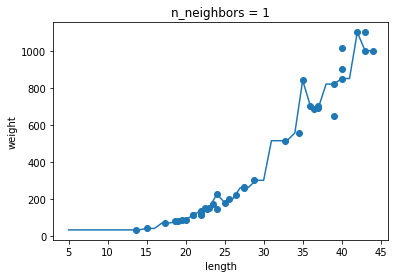

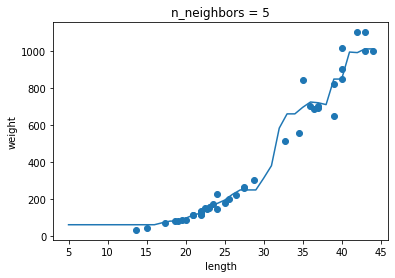

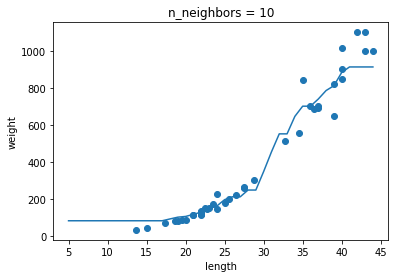

In [24]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

k=1일 때는 과적합된 것으로 보임.